## SVM

### Importing Libraries / Modules

In [32]:
# import numpy as np
import pandas as pd
from sklearn import metrics
import matplotlib.pyplot as plt
import seaborn as sns

# from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.model_selection import GridSearchCV
# from sklearn.model_selection import RandomizedSearchCV

from sklearn.svm import SVC
# from sklearn.svm import SVR

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
# from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

### Importing Dataset

In [2]:
heart_df = pd.read_csv('dataset/heart.csv')

### Exploratory Data Analysis (EDA)

In [15]:
heart_df.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [3]:
heart_df.shape

(918, 12)

In [4]:
heart_df.columns

Index(['Age', 'Sex', 'ChestPainType', 'RestingBP', 'Cholesterol', 'FastingBS',
       'RestingECG', 'MaxHR', 'ExerciseAngina', 'Oldpeak', 'ST_Slope',
       'HeartDisease'],
      dtype='object')

In [7]:
heart_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [5]:
# Extracting the numerical columns
numerical_cols = heart_df.select_dtypes(exclude=['O']).columns

In [6]:
heart_df[numerical_cols].head()

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [7]:
# Extracting the categorical columns
categorical_cols = heart_df.select_dtypes(include='object').columns

In [8]:
def explore_data(df):
    print("DATA EXPLORATION")
    print(df.shape)
    print("STATISTICAL ANALYSIS OF NUMERIC DATA")
    print(df.describe().T)

In [9]:
explore_data(heart_df)

DATA EXPLORATION
(918, 12)
STATISTICAL ANALYSIS OF NUMERIC DATA
              count        mean         std   min     25%    50%    75%    max
Age           918.0   53.510893    9.432617  28.0   47.00   54.0   60.0   77.0
RestingBP     918.0  132.396514   18.514154   0.0  120.00  130.0  140.0  200.0
Cholesterol   918.0  198.799564  109.384145   0.0  173.25  223.0  267.0  603.0
FastingBS     918.0    0.233115    0.423046   0.0    0.00    0.0    0.0    1.0
MaxHR         918.0  136.809368   25.460334  60.0  120.00  138.0  156.0  202.0
Oldpeak       918.0    0.887364    1.066570  -2.6    0.00    0.6    1.5    6.2
HeartDisease  918.0    0.553377    0.497414   0.0    0.00    1.0    1.0    1.0


In [10]:
heart_df['ExerciseAngina'].unique()

array(['N', 'Y'], dtype=object)

In [11]:
categorical_cols = heart_df.select_dtypes(include='object').columns

In [13]:
heart_df[categorical_cols].nunique()

Sex               2
ChestPainType     4
RestingECG        3
ExerciseAngina    2
ST_Slope          3
dtype: int64

In [14]:
heart_df.nunique()

Age                50
Sex                 2
ChestPainType       4
RestingBP          67
Cholesterol       222
FastingBS           2
RestingECG          3
MaxHR             119
ExerciseAngina      2
Oldpeak            53
ST_Slope            3
HeartDisease        2
dtype: int64

In [15]:
data = heart_df.groupby("ExerciseAngina")['Age'].count()

In [16]:
x_axis = list(data.index)
y_axis = list(data.values)

<BarContainer object of 2 artists>

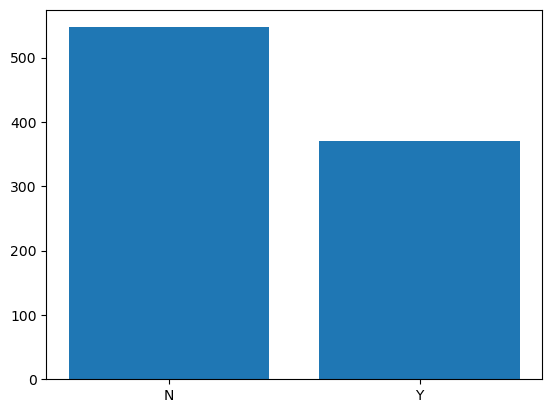

In [68]:
plt.bar(x_axis, y_axis)

<Axes: xlabel='Sex', ylabel='count'>

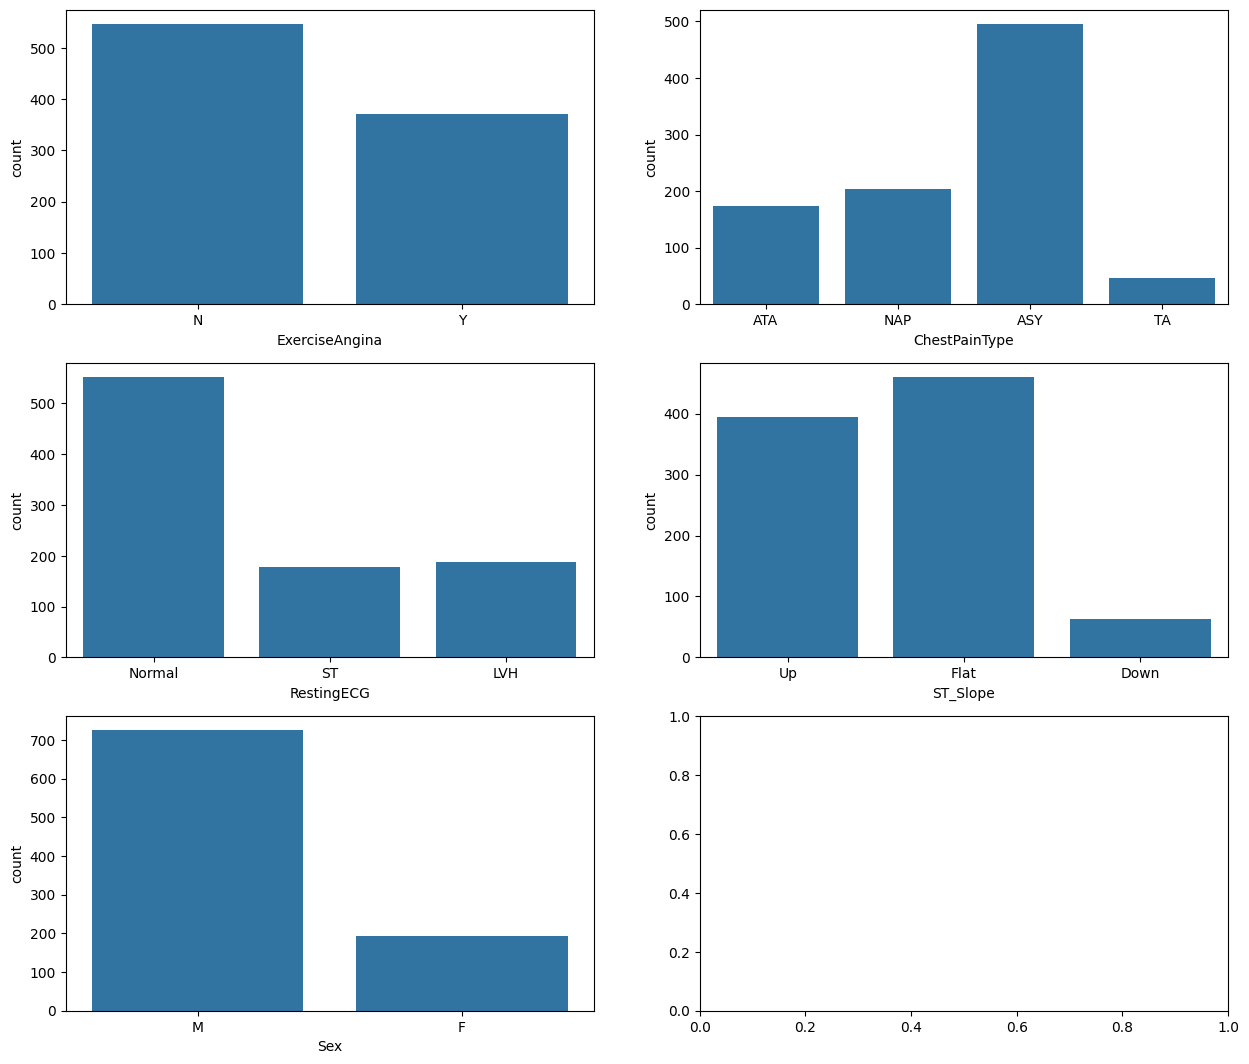

In [17]:
fig, axis = plt.subplots(3, 2, figsize=(15, 13))

sns.countplot(x='ExerciseAngina', data=heart_df, ax=axis[0, 0])
sns.countplot(x='ChestPainType' , data=heart_df, ax=axis[0, 1])
sns.countplot(x='RestingECG' , data=heart_df, ax=axis[1, 0])
sns.countplot(x='ST_Slope' , data=heart_df, ax=axis[1, 1])
sns.countplot(x='Sex' , data=heart_df, ax=axis[2, 0])

<Axes: xlabel='Sex', ylabel='Age'>

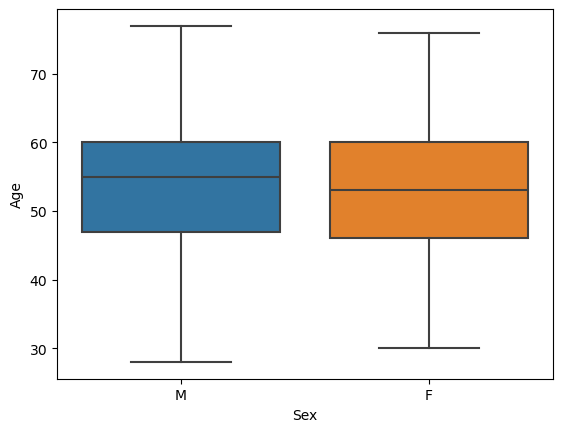

In [80]:
sns.boxplot(x='Sex', y='Age', data=heart_df)

In [18]:
# Extracting the numerical columns
numerical_cols = heart_df.select_dtypes(exclude=['O']).columns

In [19]:
numerical_data = heart_df[numerical_cols].head()

In [20]:
numerical_data.corr()['HeartDisease'].sort_values(ascending=False)

HeartDisease    1.000000
Oldpeak         0.968246
RestingBP       0.424579
Age             0.380920
MaxHR           0.023080
Cholesterol    -0.634875
FastingBS            NaN
Name: HeartDisease, dtype: float64

In [21]:
numerical_data

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease
0,40,140,289,0,172,0.0,0
1,49,160,180,0,156,1.0,1
2,37,130,283,0,98,0.0,0
3,48,138,214,0,108,1.5,1
4,54,150,195,0,122,0.0,0


In [22]:
new_data_df = heart_df.copy()

In [23]:
heart_df = pd.get_dummies(heart_df, drop_first=True, dtype=float)

In [111]:
heart_df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,49,160,180,0,156,1.0,1,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,37,130,283,0,98,0.0,0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
3,48,138,214,0,108,1.5,1,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
4,54,150,195,0,122,0.0,0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0
914,68,144,193,1,141,3.4,1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
915,57,130,131,0,115,1.2,1,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0
916,57,130,236,0,174,0.0,1,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [24]:
X = heart_df.drop('HeartDisease', axis=1).values
y = heart_df['HeartDisease'].values

In [25]:
y

array([0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 1,
       1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1,

In [26]:
X

array([[ 40., 140., 289., ...,   0.,   0.,   1.],
       [ 49., 160., 180., ...,   0.,   1.,   0.],
       [ 37., 130., 283., ...,   0.,   0.,   1.],
       ...,
       [ 57., 130., 131., ...,   1.,   1.,   0.],
       [ 57., 130., 236., ...,   0.,   1.,   0.],
       [ 38., 138., 175., ...,   0.,   0.,   1.]])

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [28]:
scalar = StandardScaler()

X_train_scaled = scalar.fit_transform(X_train)
X_test_scaled = scalar.transform(X_test)

In [29]:
svm_model = SVC()

In [121]:
# svm_model.get_params()

In [30]:
svm_model.fit(X_train_scaled, y_train)
y_pred = svm_model.predict(X_test_scaled)

In [31]:
accuracy_score(y_test, y_pred)

0.8478260869565217

In [33]:
# Model Precision: what percentage of positive tuples are labeled as such?
print("Precision:", metrics.precision_score(y_test, y_pred))

# Model Recall: what percentage of positive tuples are labelled as such?
print("Recall:", metrics.recall_score(y_test, y_pred))


Precision: 0.8538011695906432
Recall: 0.8957055214723927
